<a href="https://colab.research.google.com/github/Samin-Sadaf7/Image_works/blob/main/DIP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import cv2
from google.colab.patches import cv2_imshow

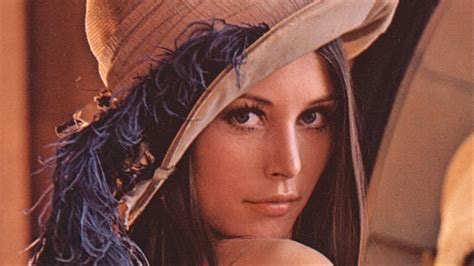

In [36]:
a = cv2.imread('/content/gdrive/MyDrive/lena.jpg')
cv2_imshow(a)

[255 255 255 ... 255 255 255]


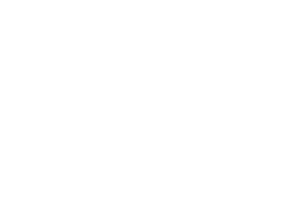

In [ ]:
flatnpArray =np.full((60000,),255,dtype=np.uint8)
print(flatnpArray)
binimg = flatnpArray.reshape(200,300)
cv2_imshow(binimg)

[0 0 0 ... 0 0 0]


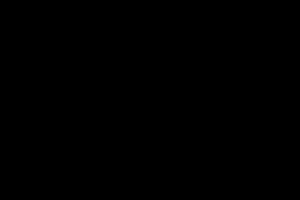

In [ ]:
flatnpArray =np.full((60000,),0,dtype=np.uint8)
print(flatnpArray)
binimg = flatnpArray.reshape(200,300)
cv2_imshow(binimg)

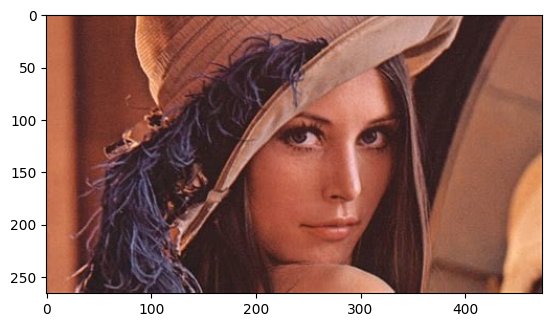

In [44]:
lena_rgb = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
plt.imshow(lena_rgb)

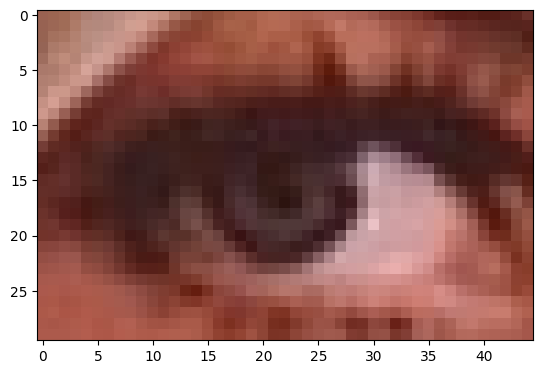

In [ ]:
left_eye=lena_rgb[100:130, 220:265]
plt.imshow(left_eye)

In [ ]:
car_img = cv2.imread('/content/gdrive/MyDrive/OIP.jpg')
car_img.shape

(270, 340, 3)

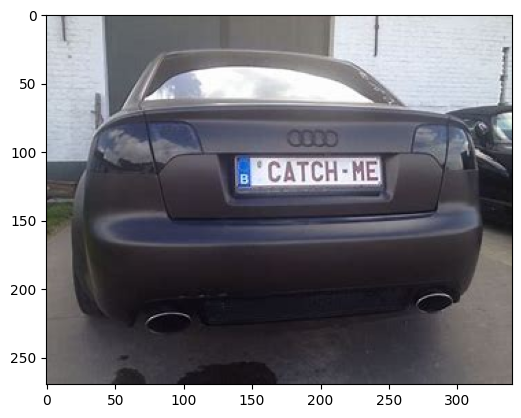

In [ ]:
rgb_car_img = cv2.cvtColor(car_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_car_img)

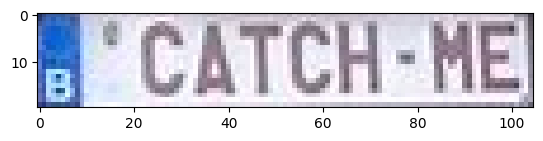

In [ ]:
plate = rgb_car_img[105:125, 140:245]
plt.imshow(plate)

In [4]:
image = np.array([
    [3, 7, 1, 5, 4],
    [0, 6, 2, 7, 3],
    [1, 4, 6, 2, 5],
    [7, 0, 3, 1, 4],
    [2, 5, 7, 6, 0]
], dtype=np.uint8)

In [5]:
def decimal_to_binary(decimal_number, bits):
    binary_number = bin(decimal_number)[2:]
    return binary_number.zfill(bits)

In [6]:
bin_image = np.array([[decimal_to_binary(value, 3) for value in row] for row in image])
bin_image

array([['011', '111', '001', '101', '100'],
       ['000', '110', '010', '111', '011'],
       ['001', '100', '110', '010', '101'],
       ['111', '000', '011', '001', '100'],
       ['010', '101', '111', '110', '000']], dtype='<U3')

In [7]:
def bit_plane_slicing(num_bits, binary_image):
  bit_planes =[np.zeros(binary_image.shape, dtype=np.uint8) for _ in range(num_bits)]
  for i in range(num_bits):
    bit_value = 2 **(num_bits - i - 1)
    bit_planes[i] = (image & bit_value) >> (num_bits - 1 - i)
  return bit_planes

In [8]:
bit_planes = bit_plane_slicing(3, bin_image)
bit_planes

[array([[0, 1, 0, 1, 1],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 0, 1],
        [1, 0, 0, 0, 1],
        [0, 1, 1, 1, 0]], dtype=uint8),
 array([[1, 1, 0, 0, 0],
        [0, 1, 1, 1, 1],
        [0, 0, 1, 1, 0],
        [1, 0, 1, 0, 0],
        [1, 0, 1, 1, 0]], dtype=uint8),
 array([[1, 1, 1, 1, 0],
        [0, 0, 0, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 1, 1, 0],
        [0, 1, 1, 0, 0]], dtype=uint8)]

In [9]:
for i, plane in enumerate(bit_planes):
    print(f"Bit Plane {i} (1-bit values):\n")
    for row in plane:
        print(" ".join([str(value) for value in row]))
    print("\n")

Bit Plane 0 (1-bit values):

0 1 0 1 1
0 1 0 1 0
0 1 1 0 1
1 0 0 0 1
0 1 1 1 0


Bit Plane 1 (1-bit values):

1 1 0 0 0
0 1 1 1 1
0 0 1 1 0
1 0 1 0 0
1 0 1 1 0


Bit Plane 2 (1-bit values):

1 1 1 1 0
0 0 0 1 1
1 0 0 0 1
1 0 1 1 0
0 1 1 0 0




In [26]:
def digital_negative(image):
  max_val = 0
  for i in range(len(image)):
    for j in range(len(image[0])):
      max_val = max(max_val, image[i][j])
  print(max_val)
  i = 0
  while((2**i)<max_val):
    i += 1
  L = 2**i
  print(L)
  return L-1-image

In [27]:
image

array([[3, 7, 1, 5, 4],
       [0, 6, 2, 7, 3],
       [1, 4, 6, 2, 5],
       [7, 0, 3, 1, 4],
       [2, 5, 7, 6, 0]], dtype=uint8)

In [28]:
dg_neg_img = digital_negative(image)
dg_neg_img

7
8


array([[4, 0, 6, 2, 3],
       [7, 1, 5, 0, 4],
       [6, 3, 1, 5, 2],
       [0, 7, 4, 6, 3],
       [5, 2, 0, 1, 7]], dtype=uint8)

In [29]:
def thresholding(image, threshold):
  output_img = np.zeros(image.shape, dtype=np.uint8)
  max_val = 0
  for i in range(len(image)):
    for j in range(len(image[0])):
      max_val = max(max_val, image[i][j])
  i = 0
  while((2**i)<max_val):
    i += 1
  L = 2**i
  for i in range(len(image)):
    for j in range(len(image[i])):
      if image[i][j]< threshold:
        output_img[i][j] = 0
      else:
        output_img[i][j] = L-1
  return output_img

In [30]:
thresholding_3_img = thresholding(image, 3)
thresholding_3_img

array([[7, 7, 0, 7, 7],
       [0, 7, 0, 7, 7],
       [0, 7, 7, 0, 7],
       [7, 0, 7, 0, 7],
       [0, 7, 7, 7, 0]], dtype=uint8)

In [31]:
def clipping(image, lower_bound, upper_bound):
  output_img = np.zeros(image.shape, dtype=np.uint8)
  max_val = 0
  for i in range(len(image)):
    for j in range(len(image[0])):
      max_val = max(max_val, image[i][j])
  i = 0
  while((2**i)<max_val):
    i += 1
  L = 2**i
  for i in range(len(image)):
    for j in range(len(image[i])):
      if image[i][j]< lower_bound or image[i][j]> upper_bound:
        output_img[i][j] = 0
      else:
        output_img[i][j] = L-1
  return output_img

In [32]:
clipped_img = clipping(image, 2, 5)
clipped_img

array([[7, 0, 0, 7, 7],
       [0, 0, 7, 0, 7],
       [0, 7, 0, 7, 7],
       [0, 0, 7, 0, 7],
       [7, 7, 0, 0, 0]], dtype=uint8)

In [49]:
def rgb_digital_negative(image):
  max_val = 0
  for i in range(len(image)):
    for j in range(len(image[i])):
        for k in range(len(image[i][j])):
          max_val = max(max_val, image[i][j][k])
  i = 0
  while((2**i)<max_val):
    i += 1
  L = 2**i
  return L-1-image

In [65]:
digital_negative_lena = rgb_digital_negative(lena_rgb)

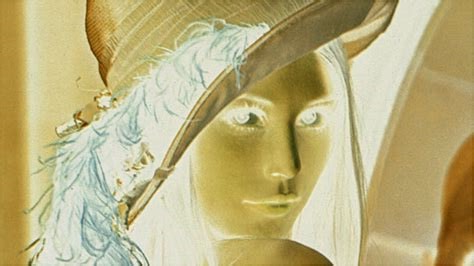

In [66]:
cv2_imshow(digital_negative_lena)

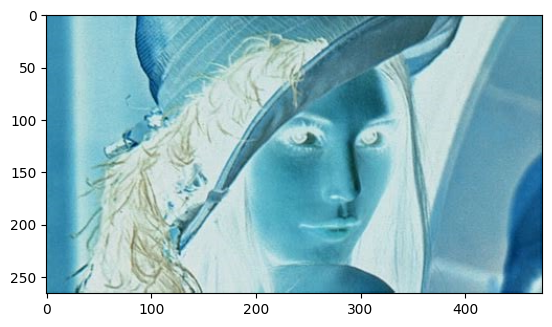

In [67]:
plt.imshow(digital_negative_lena)

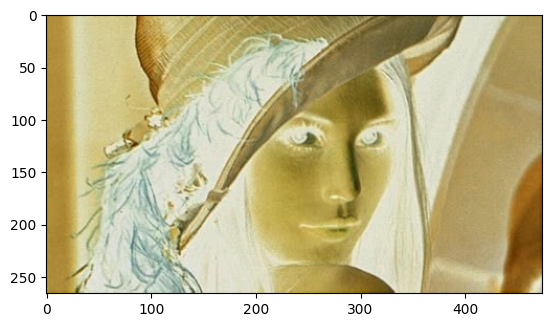

In [52]:
digital_negative_lena = cv2.cvtColor(digital_negative_lena, cv2.COLOR_RGB2BGR)
plt.imshow(digital_negative_lena)

In [53]:
def rgb_thresholding(image, threshold):
  output_img = np.zeros(image.shape, dtype=np.uint8)
  max_val = 0
  for i in range(len(image)):
    for j in range(len(image[i])):
        for k in range(len(image[i][j])):
          max_val = max(max_val, image[i][j][k])
  i = 0
  while((2**i)<max_val):
    i += 1
  L = 2**i

  for i in range(len(output_img)):
    for j in range(len(output_img[i])):
      for k in range(len(output_img[i][j])):
        if image[i][j][k]< threshold:
          output_img[i][j][k] = 0
        else:
          output_img[i][j][k] = L-1
  return output_img

In [60]:
thresholding_img = rgb_thresholding(lena_rgb, 100)

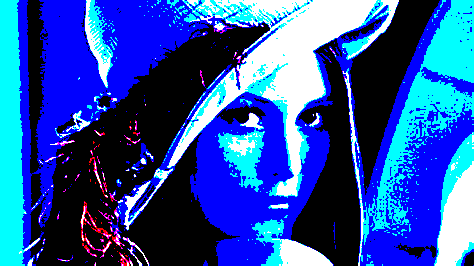

In [61]:
cv2_imshow(thresholding_img)

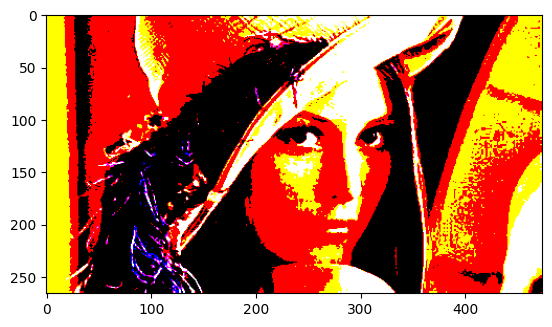

In [68]:
plt.imshow(thresholding_img)

In [62]:
def clipping_img(image, lower_bound, upper_bound):
  output_img = np.zeros(image.shape, dtype=np.uint8)
  max_val = 0
  for i in range(len(image)):
    for j in range(len(image[i])):
        for k in range(len(image[i][j])):
          max_val = max(max_val, image[i][j][k])
  i = 0
  while((2**i)<max_val):
    i += 1
  L = 2**i

  for i in range(len(output_img)):
    for j in range(len(output_img[i])):
      for k in range(len(output_img[i][j])):
        if image[i][j][k]< lower_bound or image[i][j][k]> upper_bound:
          output_img[i][j][k] = 0
        else:
          output_img[i][j][k] = L-1
  return output_img

In [63]:
clipped_img = clipping_img(lena_rgb, 100, 200)

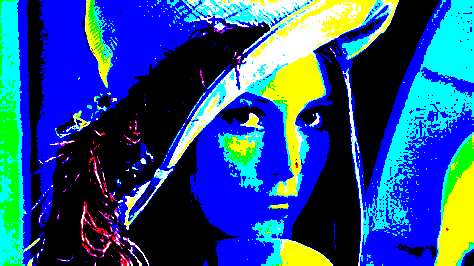

In [64]:
cv2_imshow(clipped_img)

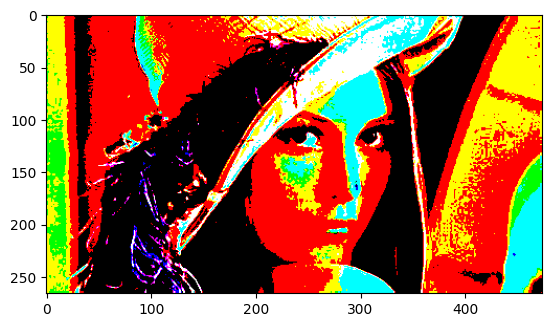

In [69]:
plt.imshow(clipped_img)

In [77]:
##Contrast Stretching
def contrast_stretching(image, r1 , r2, s1, s2):
  output_img = np.zeros(image.shape, dtype=np.uint8)
  max_val = 0
  for i in range(len(image)):
    for j in range(len(image[i])):
       max_val = max(max_val, image[i][j])

  i = 0
  while(i**2<max_val):
    i += 1

  L = 2**i

  alpha = (s1/r1)*1.0
  beta  = ((r2-r1)/(s2-s1))*1.0
  gamma = (L-1-s2)/(L-1-r2)*1.0
  print(alpha)
  print(beta)
  print(gamma)
  for i in range(len(output_img)):
    for j in range(len(output_img[i])):
      if image[i][j]<r1:
        output_img[i][j] = max(min(round(alpha*image[i][j]),L-1),0)
      elif image[i][j]>=r1 and image[i][j]<r2:
        output_img[i][j] = max(min(round(beta*(image[i][j]-r1) + s1), L-1),0)
      else:
        output_img[i][j] = max(min(round(gamma*(image[i][j]-r2) + s2), L-1),0)
  return output_img

In [78]:
contrast_strectced_img = contrast_stretching(image, 3, 5, 2, 6)

0.6666666666666666
0.5
0.5


In [79]:
image

array([[3, 7, 1, 5, 4],
       [0, 6, 2, 7, 3],
       [1, 4, 6, 2, 5],
       [7, 0, 3, 1, 4],
       [2, 5, 7, 6, 0]], dtype=uint8)

In [80]:
contrast_strectced_img

array([[2, 7, 1, 6, 2],
       [0, 6, 1, 7, 2],
       [1, 2, 6, 1, 6],
       [7, 0, 2, 1, 2],
       [1, 6, 7, 6, 0]], dtype=uint8)

In [84]:
def contrast_stretching_rgb(image, r1, r2, s1, s2):
    output_img = np.zeros(image.shape, dtype=np.uint8)
    max_val = 0
    for i in range(len(image)):
        for j in range(len(image[i])):
            for k in range(len(image[i][j])):
                max_val = max(max_val, image[i][j][k])

    i = 0
    while (i**2 < max_val):
        i += 1

    L = 2**i

    alpha = (s1 / r1) * 1.0
    beta = ((s2 - s1) / (r2 - r1)) * 1.0
    gamma = (L - 1 - s2) / (L - 1 - r2) * 1.0

    for i in range(len(output_img)):
        for j in range(len(output_img[i])):
            for k in range(len(output_img[i][j])):
                pixel_val = image[i][j][k]
                if pixel_val < r1:
                    new_val = round(alpha * pixel_val)
                elif pixel_val >= r1 and pixel_val < r2:
                    new_val = round(beta * (pixel_val - r1) + s1)
                else:
                    new_val = round(gamma * (pixel_val - r2) + s2)

                # Clamp the value to be within [0, 255]
                output_img[i][j][k] = np.clip(new_val, 0, 255)

    return output_img

In [86]:
contranst_stretching_rgb_img = contrast_stretching_rgb(lena_rgb, 100, 150, 0, 255)

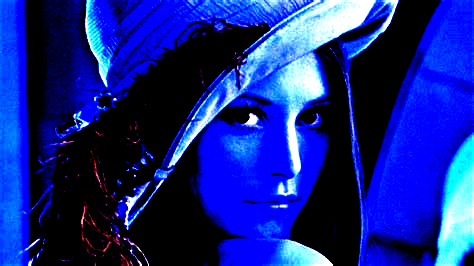

In [87]:
cv2_imshow(contranst_stretching_rgb_img)

In [88]:
def intensity_level_stretching(image, upper_bound, lower_bound, with_background):
  output_img = np.zeros(image.shape, dtype=np.uint8)
  max_val = 0
  for i in range(len(image)):
    for j in range(len(image[i])):
       max_val = max(max_val, image[i][j])

  i = 0
  while(i**2<max_val):
    i += 1

  L = 2**i

  if with_background:
    for i in range(len(output_img)):
      for j in range(len(output_img[i])):
        if image[i][j]<lower_bound or image[i][j]>upper_bound:
          output_img[i][j] = image[i][j]
        else:
          output_img[i][j] = L-1
  else:
    for i in range(len(output_img)):
      for j in range(len(output_img[i])):
        if image[i][j]<lower_bound or image[i][j]>upper_bound:
          output_img[i][j] =0
        else:
          output_img[i][j] = L-1
  return output_img

In [89]:
intensity_level_stretching_img = intensity_level_stretching(image, 5, 3, True)

In [90]:
intensity_level_stretching_img

array([[7, 7, 1, 7, 7],
       [0, 6, 2, 7, 7],
       [1, 7, 6, 2, 7],
       [7, 0, 7, 1, 7],
       [2, 7, 7, 6, 0]], dtype=uint8)

In [91]:
intensity_level_stretching_img = intensity_level_stretching(image, 5, 3, False)

In [92]:
intensity_level_stretching_img

array([[7, 0, 0, 7, 7],
       [0, 0, 0, 0, 7],
       [0, 7, 0, 0, 7],
       [0, 0, 7, 0, 7],
       [0, 7, 0, 0, 0]], dtype=uint8)

In [94]:
def intensity_level_stretching_rgb(image, upper_bound, lower_bound, with_background):
  output_img = np.zeros(image.shape, dtype=np.uint8)
  max_val = 0
  for i in range(len(image)):
    for j in range(len(image[i])):
      for k in range(len(image[i][j])):
        max_val = max(max_val, image[i][j][k])

  i = 0
  while(i**2<max_val):
    i += 1

  L = 2**i

  if with_background:
    for i in range(len(output_img)):
      for j in range(len(output_img[i])):
        for k in range(len(output_img[i][j])):
          if image[i][j][k]<lower_bound or image[i][j][k]>upper_bound:
            output_img[i][j][k] = image[i][j][k]
          else:
            output_img[i][j] = L-1
  else:
    for i in range(len(output_img)):
      for j in range(len(output_img[i])):
        for k in range(len(output_img[i][j])):
          if image[i][j][k]<lower_bound or image[i][j][k]>upper_bound:
            output_img[i][j][k] =0
          else:
            output_img[i][j][k] = L-1

  return output_img

In [95]:
intensity_level_stretching_rgb_img = intensity_level_stretching_rgb(lena_rgb, 100, 150, True)

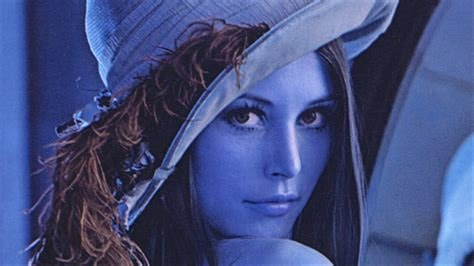

In [96]:
cv2_imshow(intensity_level_stretching_rgb_img)

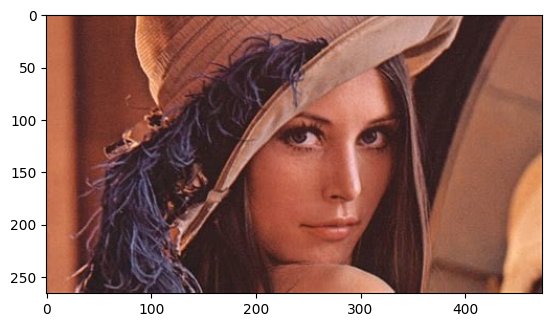

In [97]:
plt.imshow(intensity_level_stretching_rgb_img)

In [98]:
intensity_level_stretching_rgb_img = intensity_level_stretching_rgb(lena_rgb, 100, 150, False)

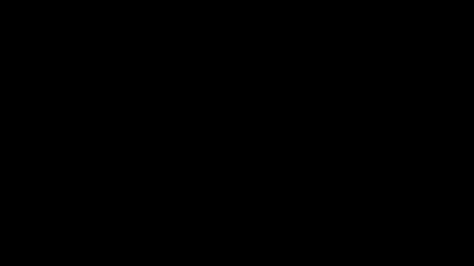

In [99]:
cv2_imshow(intensity_level_stretching_rgb_img)

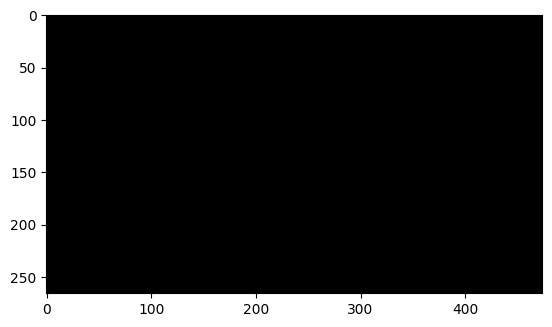

In [100]:
plt.imshow(intensity_level_stretching_rgb_img)

In [123]:
def logarithmic_operation_rgb(image, c):
  output_img = np.zeros(image.shape, dtype=np.uint8)
  for i in range(len(output_img)):
    for j in range(len(output_img[i])):
      for k in range(len(output_img[i][j])):
        value = round(c*np.log(1+image[i][j][k]))
        value= np.clip(value,0,255)
        output_img[i][j][k] = value
  return output_img

In [139]:
c = 255/np.log(1+255)
logarithmic_operation_rgb_img = logarithmic_operation_rgb(lena_rgb, c)

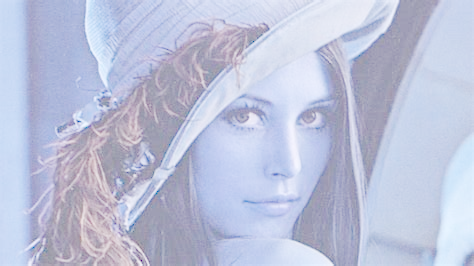

In [140]:
cv2_imshow(logarithmic_operation_rgb_img)

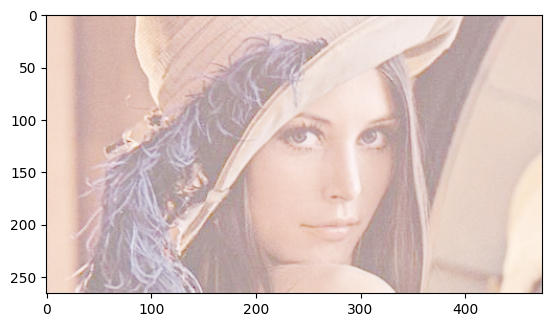

In [141]:
plt.imshow(logarithmic_operation_rgb_img)

In [134]:
def power_law_rgb(image, c, gamma):
  output_img = np.zeros(image.shape, dtype=np.uint8)
  for i in range(len(output_img)):
    for j in range(len(output_img[i])):
      for k in range(len(output_img[i][j])):
        value = round(c*(image[i][j][k]**gamma))
        value =np.clip(value,0,255)
        output_img[i][j][k] = value
  return output_img

In [142]:
power_law_rgb_img = power_law_rgb(lena_rgb,1, 0.2)

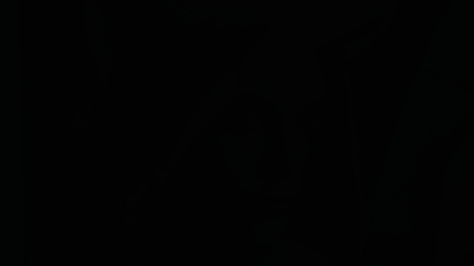

In [143]:
cv2_imshow(power_law_rgb_img)

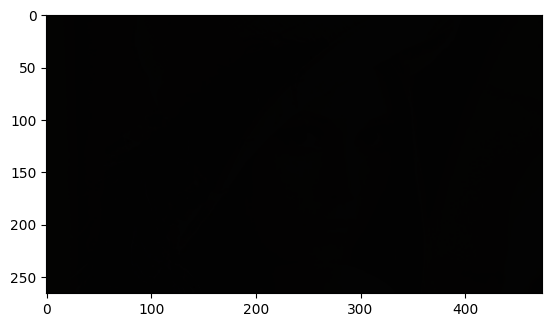

In [144]:
plt.imshow(power_law_rgb_img)